# Preprocessing of smoking.csv dataset for unsupervised learning

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# load data - using train_data.csv because of previous preprocessing
unsup_data = pd.read_csv("data/train_data.csv")

### Feature rescaling

In [38]:
num_cols = ["age", "height(cm)", "weight(kg)", "waist(cm)", "eyesight(left)", "eyesight(right)", "hearing(left)", "hearing(right)", "systolic", "fasting_blood_sugar","cholesterol", "triglyceride", "hdl", "ldl", "hemoglobin", "relaxation", "serum_creatinine", "ast", "alt", "gtp", "dental_caries", "tartar", "bmi"]
print(unsup_data.describe())
se = StandardScaler()
unsup_data[num_cols] = se.fit_transform(unsup_data[num_cols])
print(unsup_data.describe())

             gender           age    height(cm)    weight(kg)     waist(cm)   
count  44553.000000  44553.000000  44553.000000  44553.000000  44553.000000  \
mean       0.635558     44.198483    164.639755     65.854039     82.049721   
std        0.481279     12.030441      9.187349     12.779470      9.263339   
min        0.000000     20.000000    130.000000     30.000000     51.000000   
25%        0.000000     40.000000    160.000000     55.000000     76.000000   
50%        1.000000     40.000000    165.000000     65.000000     82.000000   
75%        1.000000     55.000000    170.000000     75.000000     88.000000   
max        1.000000     85.000000    190.000000    135.000000    129.000000   

       eyesight(left)  eyesight(right)  hearing(left)  hearing(right)   
count    44553.000000     44553.000000   44553.000000    44553.000000  \
mean         0.995899         0.990813       1.025116        1.025677   
std          0.328489         0.326834       0.156480        0.158172

### Subsetting
**We want to select only males from our dataset**

In [39]:
unsup_data = unsup_data.loc[unsup_data['gender']>0]
unsup_data

,gender,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,...,alt,gtp,dental_caries,tartar,smoking,bmi,healthy_weight,eyesight_total,vision,hearing_impairment
0,1,-1.595843,0.583444,0.715684,0.750308,0.012484,0.028109,-0.160509,-0.162339,-0.838274,...,0.799773,0.420054,1.922812,0.892423,1,0.514687,1.0,2.0,1,0
1,1,0.482242,0.583444,1.498198,0.858262,0.621339,0.640047,-0.160509,-0.162339,-0.472530,...,0.614873,0.080186,-0.520072,0.892423,1,1.512349,1.0,2.4,1,0
3,1,0.066625,-0.505021,-0.066830,0.534401,0.012484,0.640047,-0.160509,-0.162339,0.844147,...,0.768956,0.420054,-0.520072,0.892423,1,0.353215,1.0,2.2,1,0
4,1,-0.348992,1.671910,1.106941,0.426447,0.621339,-0.277860,-0.160509,-0.162339,-0.691977,...,-0.340441,-0.179713,-0.520072,0.892423,1,0.151376,0.0,2.1,1,0
5,1,-0.764609,0.583444,0.715684,0.966215,1.534622,0.028109,-0.160509,-0.162339,1.136742,...,0.183441,-0.179713,-0.520072,0.892423,1,0.514687,1.0,2.5,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44545,1,1.313476,0.039211,-0.066830,1.182123,-0.900799,-1.807705,-0.160509,-0.162339,1.283039,...,-0.617791,2.099402,1.922812,0.892423,1,-0.082180,0.0,1.1,1,0
44546,1,-2.011460,1.671910,1.498198,1.128146,1.534622,1.557954,-0.160509,-0.162339,-0.472530,...,-0.309625,-0.299667,1.922812,-1.120544,0,0.595422,1.0,3.0,0,0
44547,1,1.313476,1.127677,0.324427,0.966215,1.534622,0.640047,-0.160509,-0.162339,1.429337,...,0.399157,0.520015,-0.520072,0.892423,1,-0.376289,0.0,2.7,0,0
44549,1,-0.348992,1.127677,-0.066830,-0.221275,0.621339,0.028109,-0.160509,-0.162339,1.063593,...,-0.155542,-0.279675,-0.520072,-1.120544,1,-0.849169,0.0,2.2,1,0


### Visualize to compare with clustering

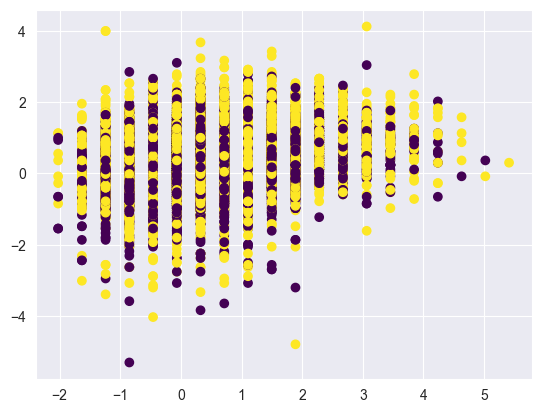

In [40]:
plt.scatter(x = unsup_data['weight(kg)'],
            y = unsup_data['hemoglobin'],
            c = unsup_data['smoking'],
            cmap = 'viridis')

### get rid of target variable - smoking

In [29]:
unsup_data.drop(["smoking"], axis=1, inplace=True)
unsup_data

,gender,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,...,ast,alt,gtp,dental_caries,tartar,bmi,healthy_weight,eyesight_total,vision,hearing_impairment
0,1,25,170,75,89.0,1.0,1.0,1.0,1.0,110.0,...,35.0,53.0,61.0,1,1,25.95,1.0,2.0,1,0
1,1,50,170,85,90.0,1.2,1.2,1.0,1.0,115.0,...,40.0,47.0,44.0,0,1,29.41,1.0,2.4,1,0
2,0,45,150,60,81.2,0.6,0.5,1.0,1.0,121.0,...,33.0,57.0,36.0,0,1,26.67,1.0,1.1,1,0
3,1,45,160,65,87.0,1.0,1.2,1.0,1.0,133.0,...,43.0,52.0,61.0,0,1,25.39,1.0,2.2,1,0
4,1,40,180,80,86.0,1.2,0.9,1.0,1.0,112.0,...,15.0,16.0,31.0,0,1,24.69,0.0,2.1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44548,0,40,170,75,84.0,0.1,0.2,1.0,1.0,116.0,...,33.0,43.0,46.0,0,0,25.95,1.0,0.3,3,0
44549,1,40,175,65,80.0,1.2,1.0,1.0,1.0,136.0,...,21.0,22.0,26.0,0,0,21.22,0.0,2.2,1,0
44550,0,60,150,50,77.0,0.9,0.9,1.0,1.0,108.0,...,24.0,23.0,25.0,1,1,22.22,0.0,1.8,1,0
44551,1,35,180,95,101.0,0.9,1.0,1.0,1.0,137.0,...,16.0,22.0,35.0,0,1,29.32,1.0,1.9,1,0


### dataframe to csv

In [33]:
unsup_data.to_csv("data/clustering_data.csv", index_label=False, index=False)